# Drivers Data
### The company hiring these drivers wants to know if there are ways they can classify their drivers: is there some set of characteristics which describe different groups?

In [11]:
library(repr)

drivers <- read.csv("drivers.csv")
head(drivers)

Driver_ID,Distance_Feature,Speeding_Feature
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25
3423313857,41.91,10


#### Plot the data:
$\rightarrow$ I am expecting that there should be at least two clusters. This is because, depending on how much each driver drives per day, they can be clustered into groups of people who drive similar distnces to them.

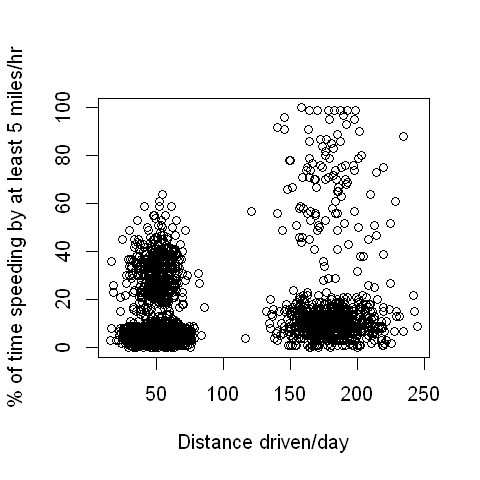

In [2]:
options(repr.plot.width=4, repr.plot.height=4)
plot(drivers$Distance_Feature, drivers$Speeding_Feature, xlab="Distance driven/day", ylab="% of time speeding by at least 5 miles/hr")

In [3]:
cluster2 = kmeans(drivers[,2:3], centers = 2, nstart=10) #2 centers
cluster4 = kmeans(drivers[,2:3], centers = 4, nstart=10) #4 centers
#cluster

drivers$Distance_Feature_rescale = scale(drivers$Distance_Feature)
drivers$Speeding_Feature_rescale = scale(drivers$Speeding_Feature)
summary(drivers)

   Driver_ID         Distance_Feature Speeding_Feature
 Min.   :3.423e+09   Min.   : 15.52   Min.   :  0.00  
 1st Qu.:3.423e+09   1st Qu.: 45.25   1st Qu.:  4.00  
 Median :3.423e+09   Median : 53.33   Median :  6.00  
 Mean   :3.423e+09   Mean   : 76.04   Mean   : 10.72  
 3rd Qu.:3.423e+09   3rd Qu.: 65.63   3rd Qu.:  9.00  
 Max.   :3.423e+09   Max.   :244.79   Max.   :100.00  
 Distance_Feature_rescale.V1 Speeding_Feature_rescale.V1
 Min.   :-1.1318874          Min.   :-0.782067          
 1st Qu.:-0.5759169          1st Qu.:-0.490278          
 Median :-0.4247561          Median :-0.344384          
 Mean   : 0.0000000          Mean   : 0.000000          
 3rd Qu.:-0.1946719          3rd Qu.:-0.125542          
 Max.   : 3.1559727          Max.   : 6.512654          

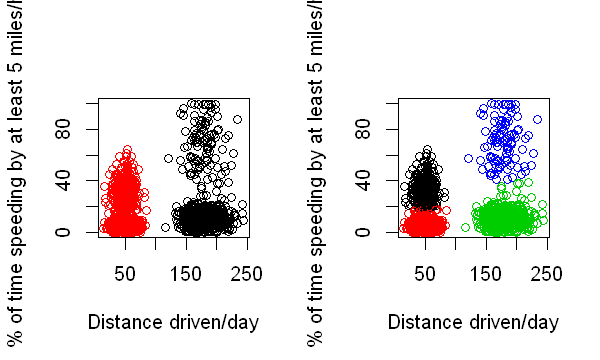

In [4]:
par(mfrow=c(1,2))
options(repr.plot.width=5, repr.plot.height=3)
plot(drivers$Distance_Feature, drivers$Speeding_Feature, xlab="Distance driven/day", ylab="% of time speeding by at least 5 miles/hr", col=cluster2$cluster)
plot(drivers$Distance_Feature, drivers$Speeding_Feature, xlab="Distance driven/day", ylab="% of time speeding by at least 5 miles/hr", col=cluster4$cluster)

#### Qualitatively describe the groups that you found.
1) driving less than 100 miles/day while 20% of the time speeding by at least 5 miles/hr
<br>
2) driving less than 100 miles/day while 20%-40% of the time speeding by at least 5 miles/hr
<br>
3) driving 200 $\pm$ 50 miles/day while 20% of the time speeding by at least 5 miles/hr
<br>
4) driving 200 $\pm$ 50 miles/day while 20%-40$ of the time speeding by at least 5 miles/hr

#### Plot the within sum of squares as a function of the number of clusters.
##### Did you pick the "right" number of clusters?

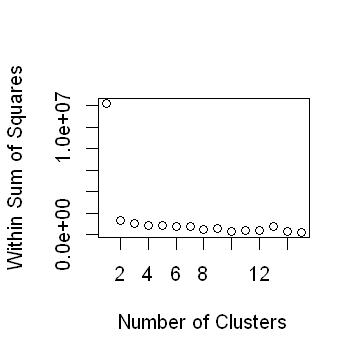

In [5]:
dataset = drivers
cols = 2:3

wss = (nrow(dataset)-1)*sum(apply(dataset[,cols], 2, var))
for (i in 2:15) wss[i] = sum(kmeans(dataset[,cols], centers=i)$withinss)
options(repr.plot.width=3, repr.plot.height=3)
plot(1:15, wss, xlab="Number of Clusters", ylab="Within Sum of Squares", xlim=c(1,15))

No, because the ideal clusterto be chosen is 2 while I set the number of clusters to be 4.

# The Virgo Cluster
### The question of interest here is: is there significant structure in the Virgo Cluster? Can we separate it into two or more distinct sub-clusters?

In [6]:
virgo <- read.csv("virgo.csv")
head(virgo)

agcnum,radeg,decdeg,vhel,sepmin
213385,179.4504,12.0400,2767,422.9651
215740,179.6683,15.5928,561,440.2495
210968,179.8908,13.8875,1450,399.8616
224386,180.0433,9.0614,464,446.0865
224234,180.2337,10.4986,2657,399.1001
226564,180.2833,14.1183,1421,379.9525


In [7]:
virgo$radeg_rescale = scale(virgo$radeg)
virgo$decdeg_rescale = scale(virgo$decdeg)
virgo$vhel_rescale = scale(virgo$vhel)

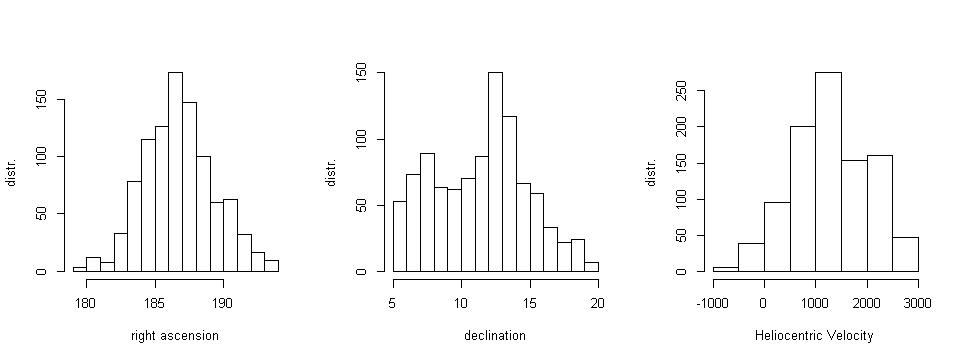

In [76]:
par(mfrow=c(1,3))
options(repr.plot.width=8, repr.plot.height=3)
hist(virgo$radeg, xlab="right ascension", ylab="distr.", main="")
hist(virgo$decdeg, xlab="declination", ylab="distr.", main="")
hist(virgo$vhel, xlab="Heliocentric Velocity", ylab="distr.", main="")

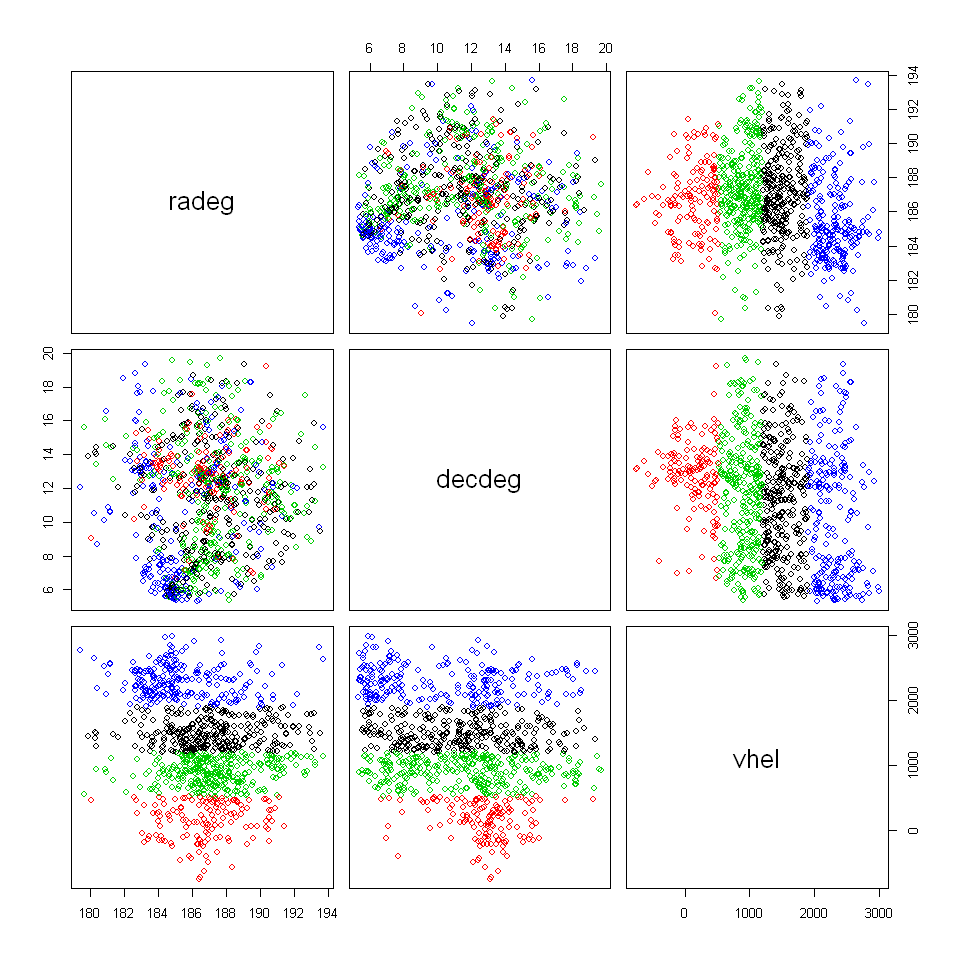

In [8]:
#cluster2 = kmeans(virgo[,2:4], centers = 2, nstart=10)
#cluster3 = kmeans(virgo[,2:4], centers = 3, nstart=10)
cluster4 = kmeans(virgo[,2:4], centers = 4, nstart=10)

options(repr.plot.width=8, repr.plot.height=8)
pairs(virgo[2:4], col=cluster4$cluster)

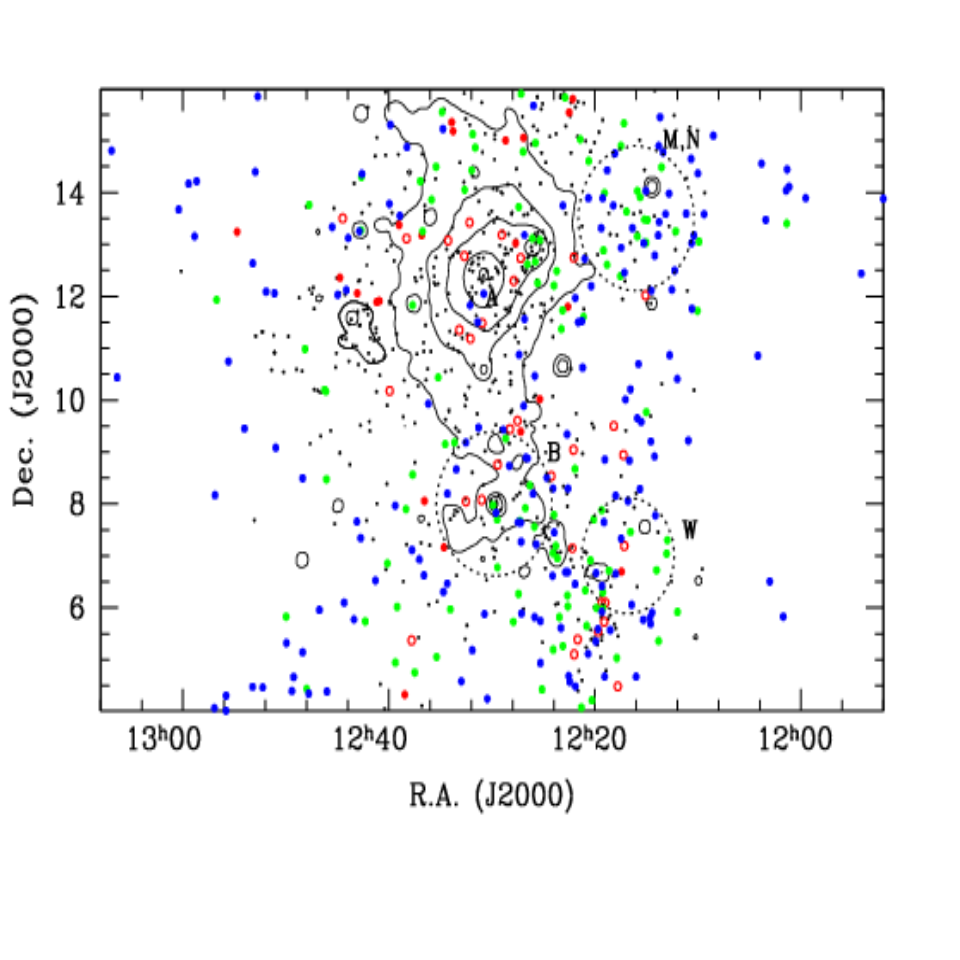

In [109]:
library(png)
img <- readPNG('Untitled.png')
grid::grid.raster(img, width = 1.5, height = 1, hjust = .39)

#### Do you see any natural clustering in this dataset? How many clusters do you think will best fit this dataset?
4

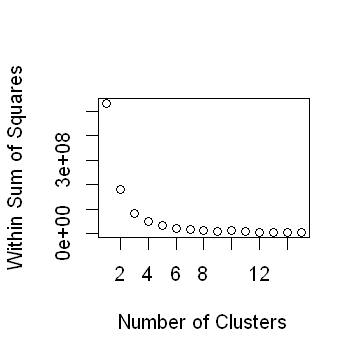

In [64]:
dataset = virgo
cols = 2:4

wss = (nrow(dataset)-1)*sum(apply(dataset[,cols], 2, var))
for (i in 2:15) wss[i] = sum(kmeans(dataset[,cols], centers=i)$withinss)
options(repr.plot.width=3, repr.plot.height=3)
plot(1:15, wss, xlab="Number of Clusters", ylab="Within Sum of Squares", xlim=c(1,15))